In [3]:
import pandas as pd
import os
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt


In [4]:
file_path = '/Users/yanlixu/Desktop/pingan/合作/CDK12/220608/LINSCP_for_drug_combinations'
files = os.listdir(file_path)

In [5]:
file_list = []
gene_list = []
diff_value_list = []

for file in files:
    if os.path.isfile(os.path.join(file_path, file)):
        file_list.append(file.replace(' .csv', ''))
        if file == 'LINCSCP_131876 .csv':
            gene_list = data['Name_GeneSymbol'].tolist()       
        data = pd.read_csv(os.path.join(file_path, file))
        diff_value_list.append(data['Value_LogDiffExp'].tolist())

     

In [6]:
diff_value_df = pd.DataFrame(diff_value_list)
diff_value_df = diff_value_df.transpose()

In [7]:
diff_value_df.columns = file_list
diff_value_df.index = gene_list
diff_value_df


LINCSCP_135119  LINCSCP_132633  LINCSCP_132799  LINCSCP_138394  \
AARS          -1.051640        0.184166       -0.669090       -2.908100   
ABCF1         -0.354414        0.262992       -1.277380       -0.591225   
ABL1          -1.786470        0.815821       -1.572860       -0.941629   
ACAA1         -0.125800        1.565410        0.773275        0.584377   
ACAT2         -2.474760       -1.200910       -2.292480       -4.506790   
...                 ...             ...             ...             ...   
TXLNA         -0.922860        0.608168        0.604441        1.342910   
SPRED2         0.936911       -1.107080       -0.075491        0.474223   
EML3           1.259370       -0.218833       -1.154410        0.436730   
TMEM110       -0.335950       -0.054169       -0.715620       -1.218830   
FAM69A        -0.220236       -0.780482        0.145059        0.575219   

         LINCSCP_139585  LINCSCP_35854  LINCSCP_30569  LINCSCP_36517  \
AARS          -1.911700      -0.638212       1.218810       -1.68000   
ABCF1          0.602885       0.120736      -1.217240       -0.14025   
ABL1          -2.858630       1.412220      -0.555867       -0.50360   
ACAA1          2.617640      -0.069574       0.836228       -0.21740   
ACAT2         -1.105260       1.288220      -0.551309       -1.55960   
...                 ...            ...            ...            ...   
TXLNA          0.255000      -0.268396      -0.225746       -1.27990   
SPRED2         2.229880      -1.279790      -0.500467        0.22790   
EML3          -1.080310       1.184490       0.237454       -0.87515   
TMEM110       -0.300805       1.955080       0.056441       -2.55375   
FAM69A         1.205230       0.004216      -0.561663        0.82905   

         LINCSCP_135676  LINCSCP_142931  ...  LINCSCP_33151  LINCSCP_139379  \
AARS          -3.599850        0.011819  ...      -2.934160        0.166164   
ABCF1          0.843781        0.466803  ...      -0.206350       -0.953060   
ABL1          -0.290605       -3.507780  ...      -1.408750       -2.377580   
ACAA1          1.519470       -0.061914  ...       0.363530        1.316560   
ACAT2         -4.860220        0.912285  ...      -3.771230       -1.300350   
...                 ...             ...  ...            ...             ...   
TXLNA          2.144010       -0.347715  ...       0.959712        1.272200   
SPRED2         0.073324        4.387460  ...      -0.372637       -0.054954   
EML3          -0.520339       -0.077949  ...       0.649001       -0.759897   
TMEM110       -0.595711       -0.531823  ...      -1.102990       -0.846253   
FAM69A        -0.113633        1.060300  ...       1.004740        0.250150   

         LINCSCP_131876  LINCSCP_36580  LINCSCP_33106  LINCSCP_34293  \
AARS          -0.015345       0.726225       0.629188      -1.799670   
ABCF1          0.434771      -0.997386      -0.379650       0.979107   
ABL1          -0.057408       0.747060      -2.035430      -0.328894   
ACAA1          0.552876       0.346288      -0.286927       3.495000   
ACAT2          0.111123      -0.332020       1.994870      -1.550050   
...                 ...            ...            ...            ...   
TXLNA          0.512835       0.423121       0.623962       0.189755   
SPRED2        -3.952580      -0.195201      -0.419722       0.115248   
EML3           0.037753      -0.162712       1.346060       0.568972   
TMEM110       -0.034493       0.179417      -1.310020       0.773543   
FAM69A        -0.511912      -0.257609       1.031790      -0.157464   

         LINCSCP_33805  LINCSCP_139791  LINCSCP_33043  LINCSCP_140827  
AARS          0.140032       -1.508440       0.025244       -1.006300  
ABCF1         0.245910       -1.066430      -1.647610       -0.402908  
ABL1          1.741930       -1.132410       0.098510        0.732909  
ACAA1         1.577580        0.942017      -0.078643        1.974300  
ACAT2         0.493359       -1.412700       1.851750       -3.924240

## PART 1: plot all the genes

/opt/anaconda3/envs/deepchem_py37/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


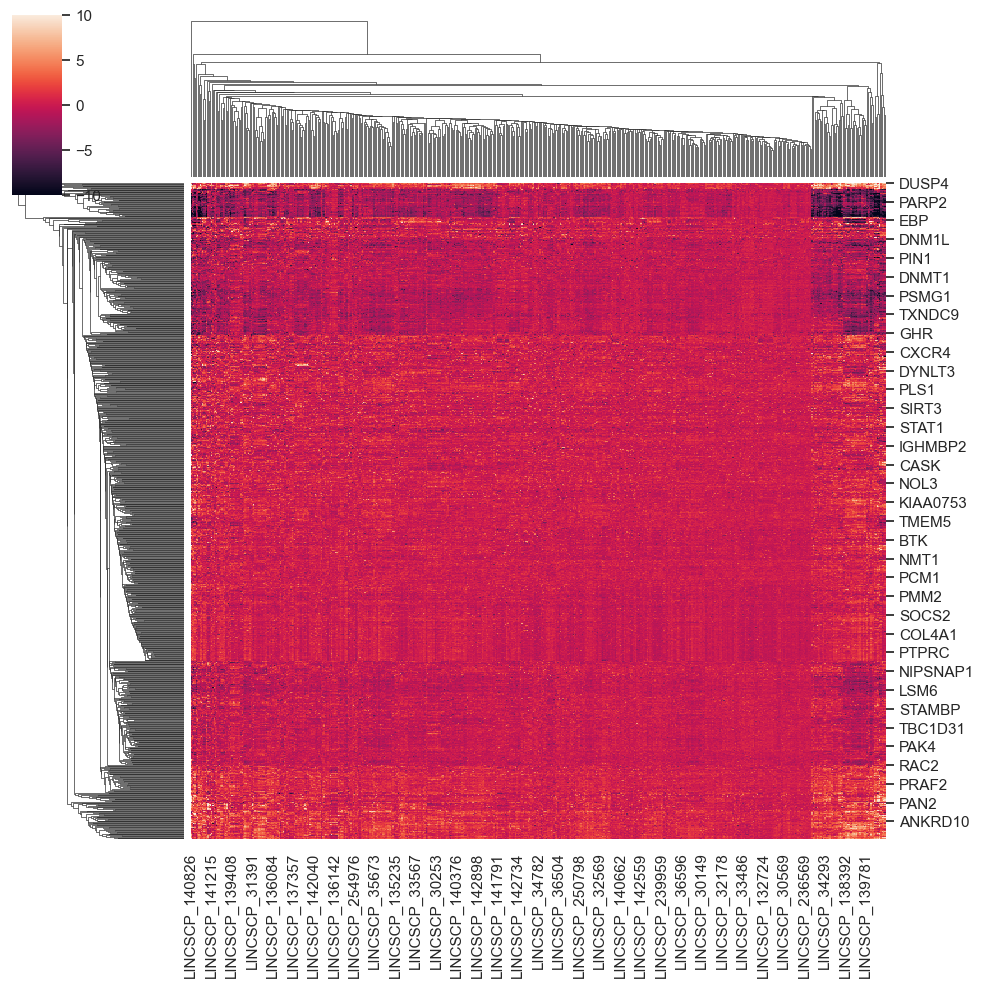

In [8]:
ax = sns.clustermap(diff_value_df)
plt.show()

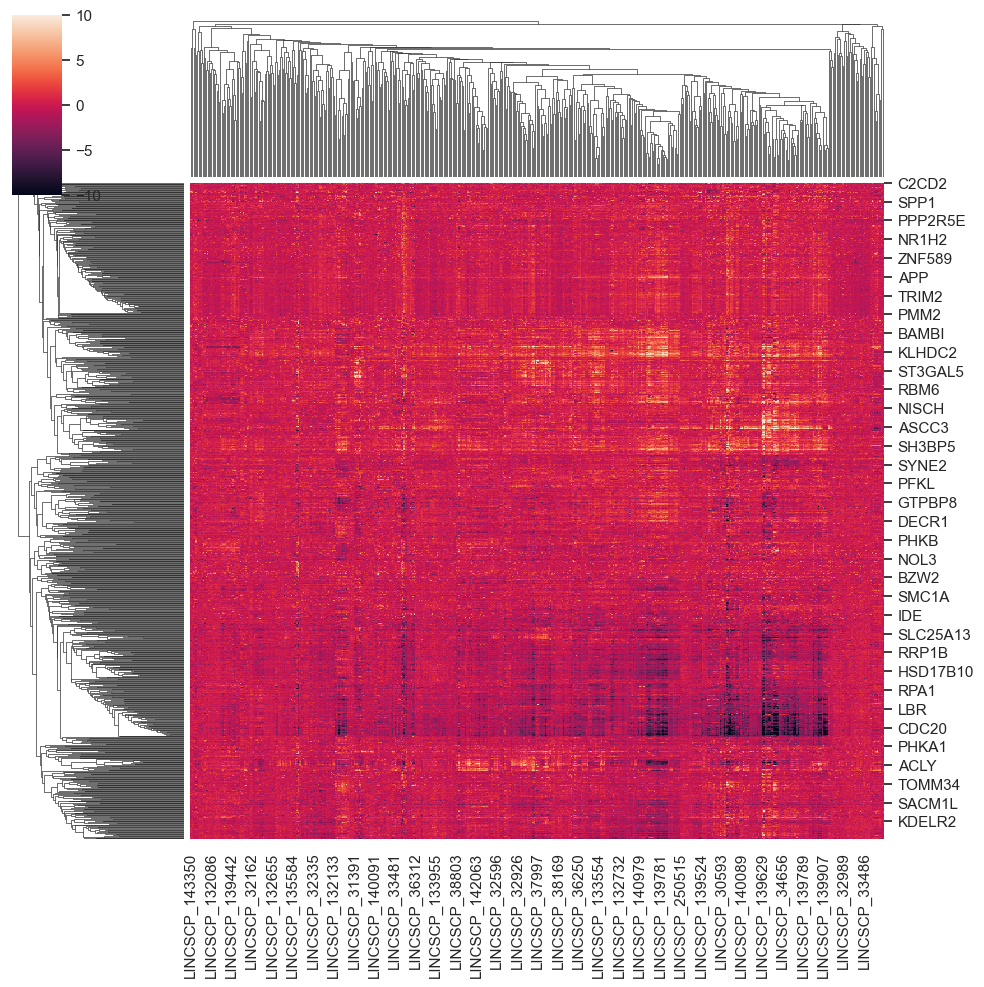

In [9]:
ax = sns.clustermap(diff_value_df, metric="correlation")
plt.show()

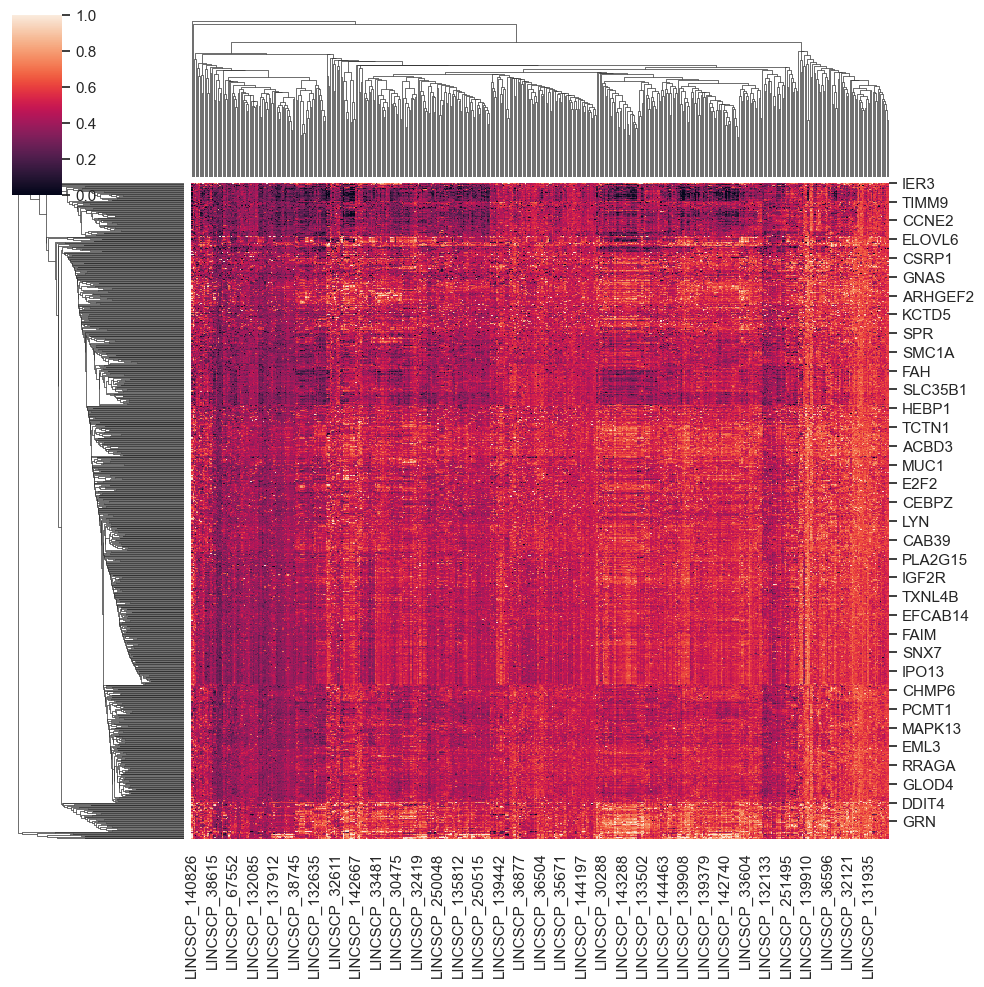

In [10]:
ax = sns.clustermap(diff_value_df, standard_scale=1)
plt.show()

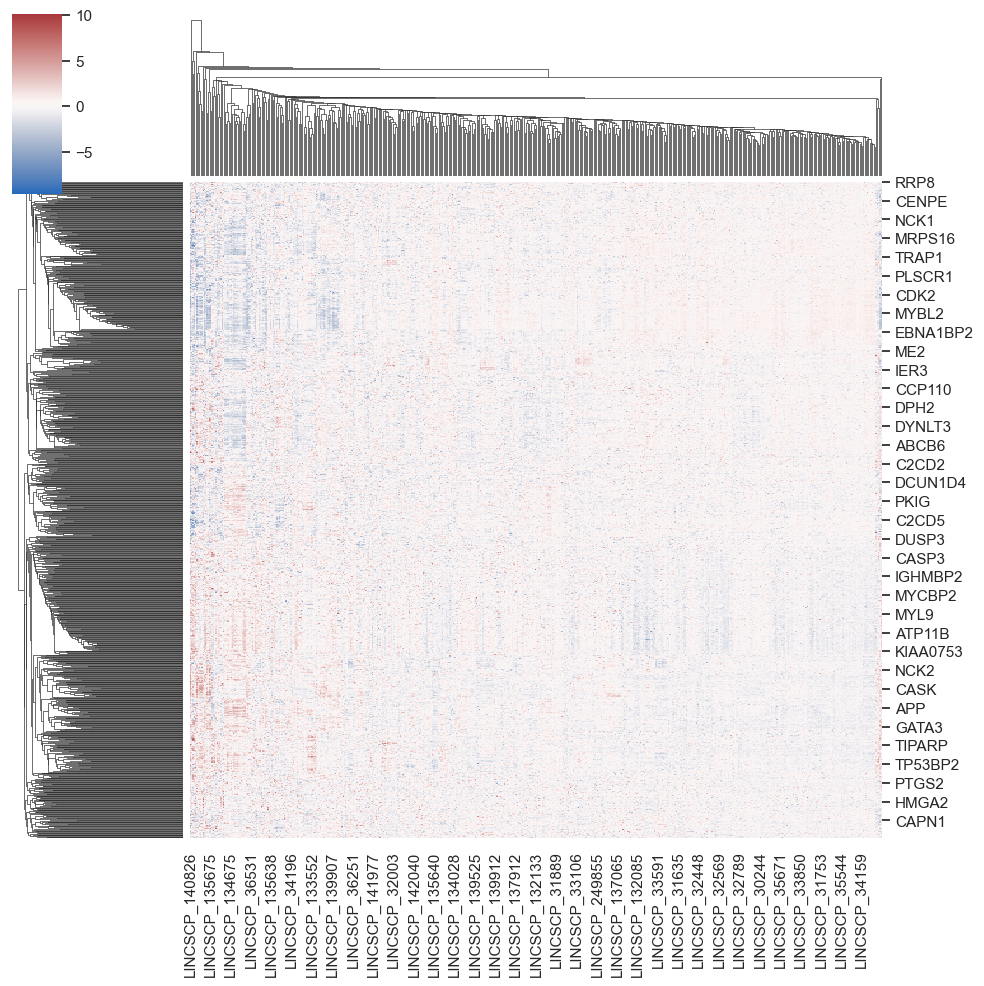

In [11]:
ax = sns.clustermap(diff_value_df, z_score=0, cmap="vlag")
plt.show()

## PART 2: plot top 150 up and down genes

In [12]:
# get top upregulated and down regulated genes
top_genes_data = pd.read_excel('/Users/yanlixu/Desktop/pingan/合作/CDK12/220608/1_breast_cancer_20220608.xlsx', sheet_name='top_640_genes')
top_genes = top_genes_data['Name_GeneSymbol']


In [13]:
# get the intersect of LINCS_data_genes and top upregulated and down regulated genes
top_genes_list = top_genes.tolist()
common_genes = list(set(top_genes_list) & set(diff_value_df.index))

In [14]:
diff_value_df_sub = diff_value_df.loc[common_genes]
diff_value_df_sub

LINCSCP_135119  LINCSCP_132633  LINCSCP_132799  LINCSCP_138394  \
CDK1         -1.181230       -0.324136       -0.074679       -1.738760   
CCNA2        -2.237130       -0.073553        0.037892       -1.593790   
CDC25B        1.196870        0.633913       -0.171035       -1.436540   
GRB7         -0.733341       -0.493916       -0.254027        0.632721   
CDC25A       -1.018540        0.103823        0.020438       -0.324055   
ERBB2         0.713688       -0.013245        0.651382        1.046470   
MYBL2        -0.666793        0.030688       -0.102003       -1.262280   
CENPE         0.354245       -0.821878       -0.436274       -1.100210   
GATA3         0.946987        0.749185        0.857018        3.254980   
KIF14        -3.096120       -0.054854        0.073052       -1.087340   
EVL           0.946395        0.271581        0.810431        1.482480   
ORC1         -0.329671       -0.349063        0.164016       -1.066690   
UBE2C        -1.733990        0.229681        0.522452       -1.586320   
BUB1B        -1.367600       -0.333383       -0.180426       -0.643180   
CHAC1        -0.307420       -0.046509       -0.040987       -0.289182   
BCL2          0.118995        0.639572        0.366932        0.600968   
TOP2A        -4.332880       -0.263997        0.729383       -1.526600   
LAMA3        -0.191411        1.122560        0.156481        0.222626   
AURKB        -2.158650        0.167131        0.078657       -1.416590   
AURKA        -1.551470       -0.150657       -0.080711       -2.488470   
MMP1         -0.333953       -0.756466       -0.483909       -0.295427   
CCNB1        -1.505030       -0.382608        0.049830       -3.522990   
CCNB2        -2.913710       -1.588320       -0.119828       -2.945360   
HIF1A         0.220730        1.002980       -0.068725       -0.385026   
PHGDH        -0.912651        1.437910       -1.009440       -3.546500   
FGFR4        -0.574320       -0.232896       -1.155220       -0.307890   
STMN1        -0.212469        0.420817        0.816375        0.646049   
KIF2C         0.872207       -0.161408        0.385563        0.589700   
JADE2        -0.443505        2.960470        0.662610        0.267344   
IGF1R         0.438893        0.505020        0.755269        0.404355   
FAM63A        1.700440        0.928885        0.144948        2.792390   
PLK1         -1.796590       -0.138413       -0.376653        0.547696   
E2F2         -0.195935       -0.415035       -0.464172        2.880240   
NUSAP1       -2.326240       -0.726226        0.544690       -1.298350   
MELK         -3.630370       -0.080624       -0.254430       -1.496320   
CDC45        -1.313340       -0.344993        0.016497        0.732345   
NT5DC2        1.131390        0.115355        0.536173        0.644174   
CCNE2         0.096956       -0.391006        0.158480        0.843196   
PMAIP1        0.211505       -0.682665       -0.150901        0.499340   
KIF20A       -3.179220        0.202713        0.663048       -1.770240   
FGFR2        -0.153426       -0.200864       -0.037242        0.251672   
BIRC5        -2.514860        0.103394       -0.111482       -2.101980   
CDC20        -3.933380        0.466745        0.004829       -2.301830   

        LINCSCP_139585  LINCSCP_35854  LINCSCP_30569  LINCSCP_36517  \
CDK1         -8.436180      -2.344040      -1.453770       -0.06570   
CCNA2        -8.268860      -2.549810      -0.490322       -0.99480   
CDC25B       -0.330521      -0.728186       0.081741       -0.04230   
GRB7          0.729995      -0.227069      -0.644247        0.72425   
CDC25A       -2.992400      -1.265950      -0.921761       -2.23455   
ERBB2         2.048810       0.161055       0.743005        1.48330   
MYBL2        -3.540650      -3.649180      -0.696317       -3.21435   
CENPE        -1.362320      -1.077800      -0.687895       -0.30955   
GATA3         2.154660       1.310780       0.420666        2.42500   
KIF14        -9.575260      -2.284790    

/opt/anaconda3/envs/deepchem_py37/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


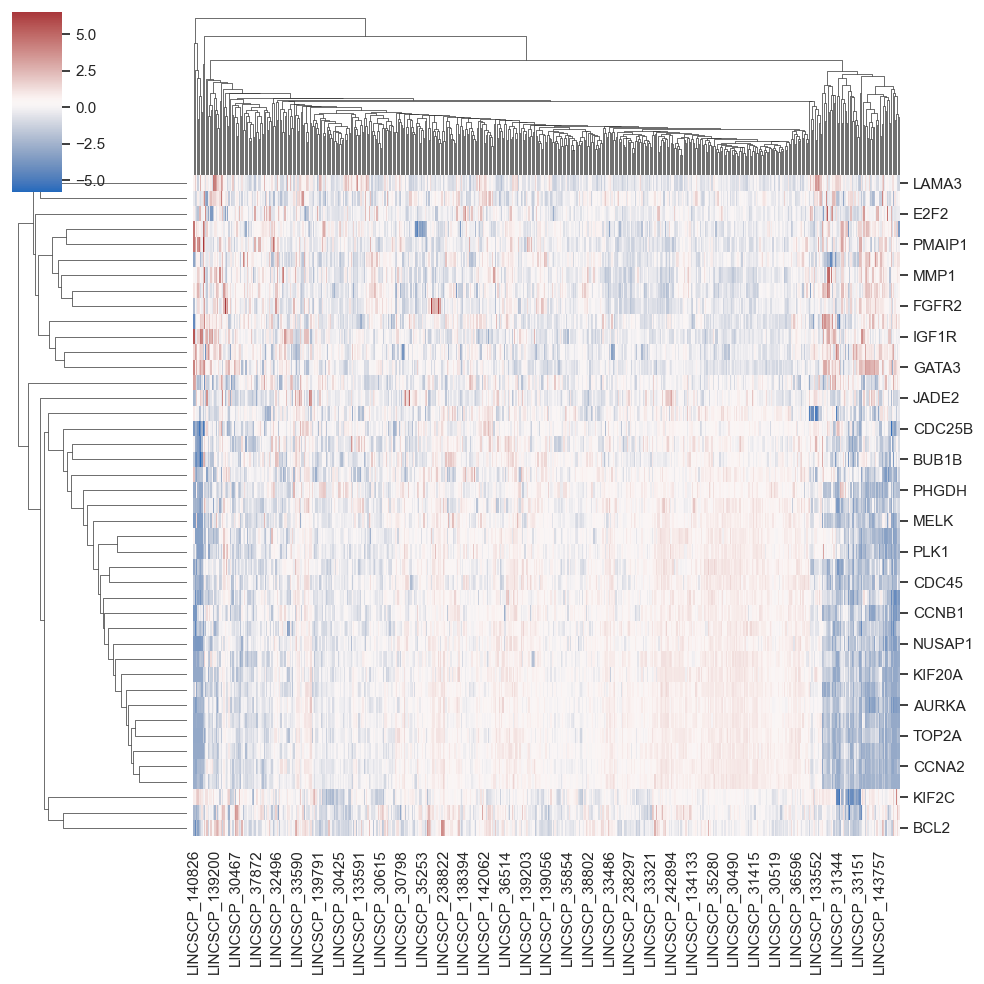

In [15]:
ax = sns.clustermap(diff_value_df_sub, z_score=0, cmap="vlag")
plt.show()

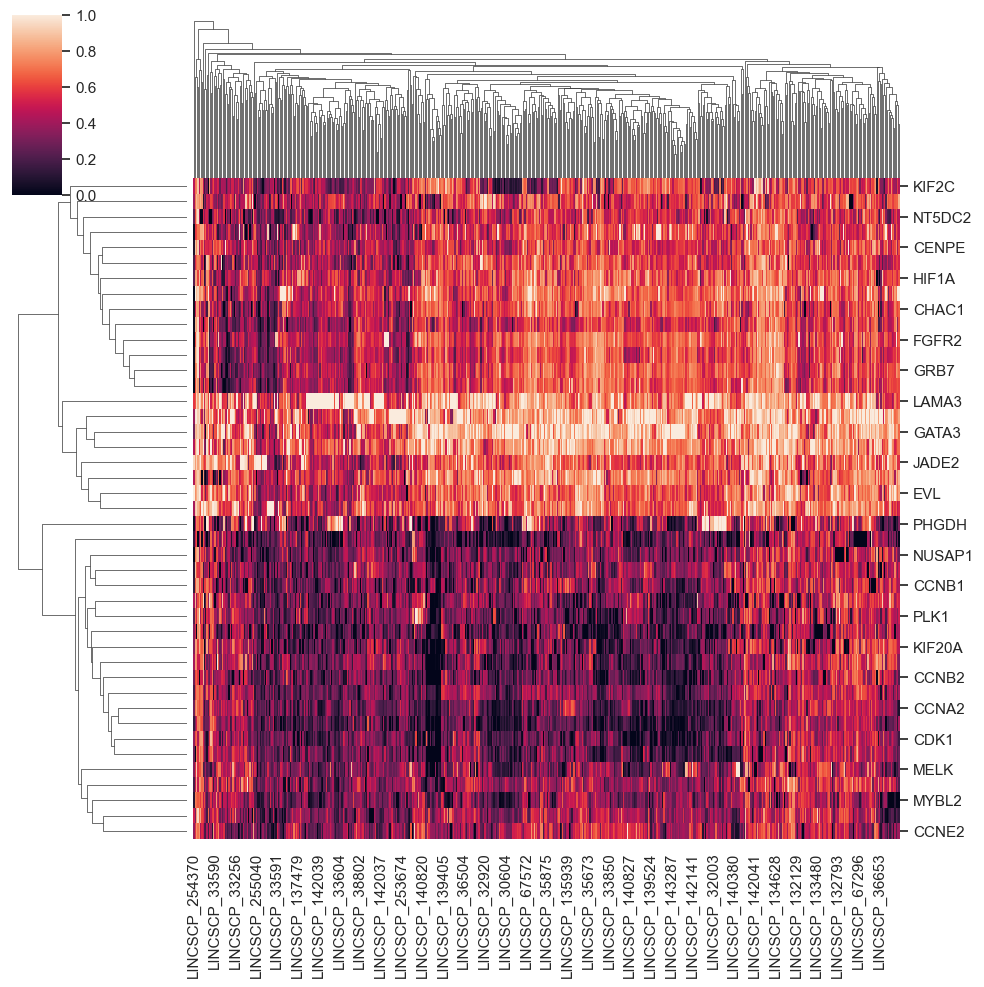

In [16]:
ax = sns.clustermap(diff_value_df_sub, standard_scale=1)
plt.show()

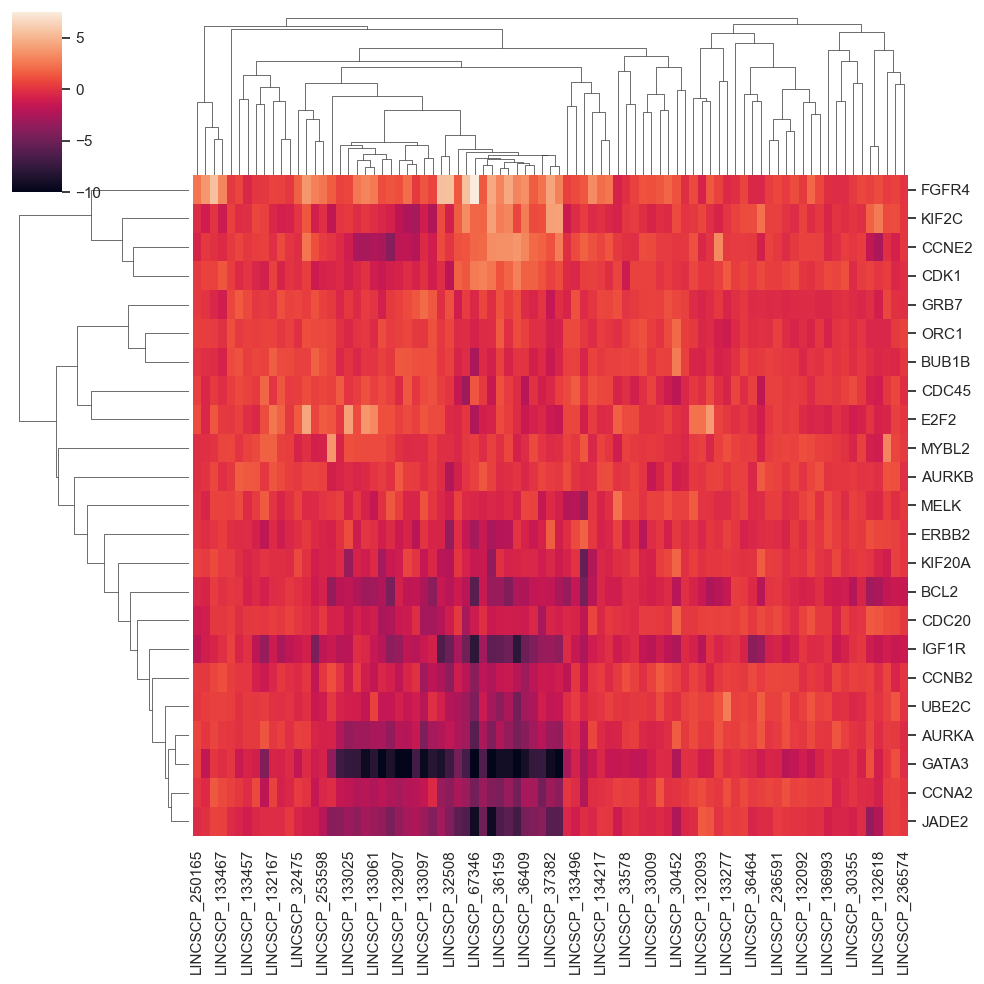

In [59]:
ax = sns.clustermap(diff_value_df_sub, metric="correlation")
plt.show()

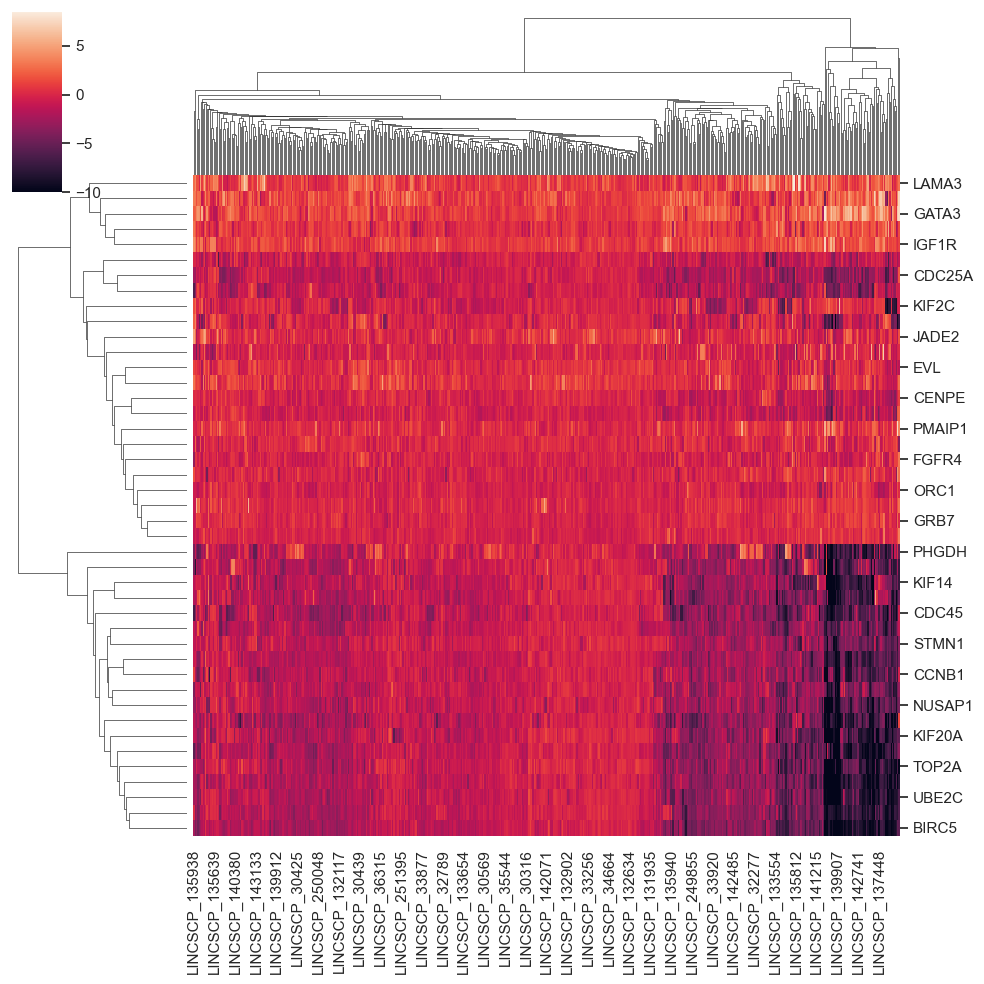

In [17]:
ax = sns.clustermap(diff_value_df_sub)
plt.show()